<a href="https://colab.research.google.com/github/allanstar-byte/Image-Classification-using-MLP/blob/main/Building_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an Image Classifier
First let's install and import TensorFlow and Keras

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

> conda install tensorflow

> conda install pip 

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.5.0'

In [4]:
tf.__version__


'2.5.0'

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

We will use a Dataset of 60,000 28x28 grayscale images of 10 fashion categories to train our model, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot



### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
# pooling the dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


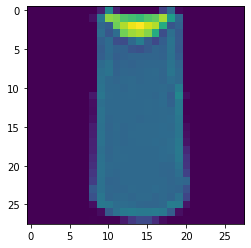

In [6]:
# using matplotlib.pyplot to view the images
plt.imshow(X_train_full[2])

In [7]:
# checking the name / cartegory of the viewed image
y_train_full[2]

0

In [8]:
# creating a list of class names to enable output the name of the image
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[2]]

'T-shirt/top'

In [10]:
# viewing the 28 by 28 pixel values of the bag
X_train_full[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [11]:
# dividing with 255. in order to get a float between 0 and 1
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.
X_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Split the data into train/validation/test datasets
In the earlier step of importing the data, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

![](Seq_api.png "Title")

![](Functional.JPG "Title")

In [14]:
# To help replicate the same nubers each time.
np.random.seed(42)
tf.random.set_seed(42)

![](Structure.jpg "Title")

In [15]:
# creating the model object using the sequential API
model = keras.models.Sequential()

# flattenig the 2D array of 28 by 28 to a 1D array of 784 in the input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# creating the hidden layers using the relu activation funtions
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# creating the output layer using softmax activation funtion
# since we need 10 outputs
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
# Displaying the layers, output shape and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


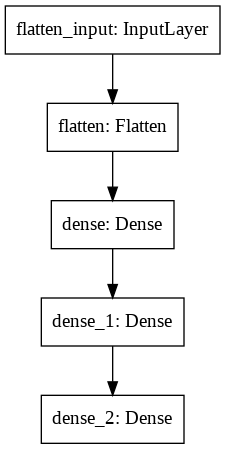

In [17]:
# visualizing the neural network
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

**Creating the Learning process**

Documentation - https://keras.io/models/sequential/

In [23]:
# compiling the model
#
# using sparse_categorical_crossentropy since our data is available as labels (10 items)
# where for binary we can use binary_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              #using Stochastic gradient Descent (sdg). I.e the model to perform back propagation algorithm
              optimizer="sgd",
              # metrics we use accurancy since its a classification problem
              # if it was a regression problem we could use MSE
              metrics=["accuracy"])

In [24]:
# fitting the model into our dataset using 30 epochs
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5337 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4122 - accuracy: 0.8566 - val_loss: 0.3914 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3740 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8675 - val_loss: 0.3709 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3607 - val_accuracy:

In [25]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [26]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8456363677978516,
  0.8566363453865051,
  0.8621818423271179,
  0.8675090670585632,
  0.8714545369148254,
  0.8750181794166565,
  0.878781795501709,
  0.88234543800354,
  0.8836727142333984,
  0.8868727087974548,
  0.8892909288406372,
  0.8913999795913696,
  0.8941090703010559,
  0.8970909118652344,
  0.8977636098861694,
  0.9000181555747986,
  0.9021090865135193,
  0.9037091135978699,
  0.9054363369941711,
  0.9070909023284912,
  0.9079999923706055,
  0.9101999998092651,
  0.9121817946434021,
  0.9135090708732605,
  0.9149818420410156,
  0.9160363674163818,
  0.9187454581260681,
  0.9193454384803772],
 'loss': [0.7237027883529663,
  0.4842100441455841,
  0.43909206986427307,
  0.41219282150268555,
  0.393882691860199,
  0.375067800283432,
  0.36316296458244324,
  0.3516094386577606,
  0.3413417339324951,
  0.3318415880203247,
  0.3238411247730255,
  0.3148025572299957,
  0.30782994627952576,
  0.30204150080680847,
  0.2944266

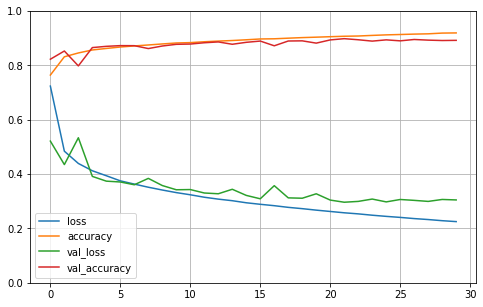

In [27]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8818


[0.3393108546733856, 0.8817999958992004]

In [38]:
X_new = X_test[:3]

In [39]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


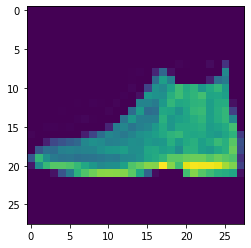

In [33]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


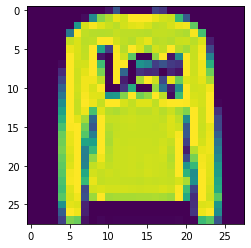

In [34]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


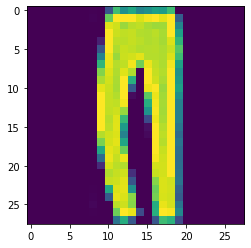

In [35]:
print(plt.imshow(X_test[2]))